# Лабораторная работа 2.2.6

# Энергия активации

## Теория

По формуле Стокса сила вязкого трения, действующего на шарик
$$ F=6\pi\eta rv $$
Найдем установившуюся скорость из того, что сила вязкого трения компенсируется силой Архимеда и силой тяжести:
$$ v_{\text{уст}}=\frac{Vg(\rho-\rho_{\text{ж}})}{6\pi\eta r}=\frac 2 9 gr^2\frac{\rho-\rho_{\text{ж}}}{\eta} $$
Отсюда вязкость равна
$$ \eta=\frac 2 9 gr^2\frac{\rho-\rho_{\text{ж}}}{v_{\text{уст}}} $$
Измерять будем время, за которое шарик проходит 20 см в установившемся режиме падения, из которого и вычислим $v_{\text{уст}}$

In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import pandas as pd
import numpy as np
from scipy.optimize import curve_fit
import smartlab as sl

## Измерения

In [3]:
data = pd.read_csv('Activation.tsv', delimiter='\t')
data

,"$T, K$","$d_1^g, mm$","$t_1^g, s$","$d_2^g, mm$","$t_2^g, s$","$d_1^s, mm$","$t_1^s, s$","$d_2^s, mm$","$t_2^s, s$"
0,298,2.06,23.62,2.08,23.51,0.78,31.19,0.60,43.03
1,303,2.08,20.94,2.14,19.28,0.66,31.72,0.92,17.97
2,308,2.14,15.65,2.12,15.03,0.82,16.34,0.84,21.22
3,313,2.10,11.46,2.06,11.10,0.90,10.81,0.90,13.19
4,318,2.06,8.00,2.08,7.60,0.86,9.22,0.94,6.78
5,323,2.04,6.19,2.02,5.88,0.84,6.56,0.84,6.57
6,328,2.12,4.94,2.08,4.72,0.84,5.16,0.76,6.12


## Обработка

In [13]:
df = pd.DataFrame()
df['$T^{-1}, K^{-1}$'] = 1.0/data['$T, K$']
df['$\\eta_1^g, \\frac{kg}{s\\cdot m}$'] = 9.8/18 * ((data['$d_1^g, mm$']/1000) ** 2) * (2500-1250) * data['$t_1^g, s$'] / 0.2
df['$\\eta_2^g, \\frac{kg}{s\\cdot m}$'] = 9.8/18 * ((data['$d_2^g, mm$']/1000) ** 2) * (2500-1250) * data['$t_2^g, s$'] / 0.2
df['$\\eta_1^s, \\frac{kg}{s\\cdot m}$'] = 9.8/18 * ((data['$d_1^s, mm$']/1000) ** 2) * (7800-1250) * data['$t_1^s, s$'] / 0.2
df['$\\eta_2^s, \\frac{kg}{s\\cdot m}$'] = 9.8/18 * ((data['$d_2^s, mm$']/1000) ** 2) * (7800-1250) * data['$t_2^s, s$'] / 0.2
df['$ln(\\eta)$'] = np.log(1000*(df['$\\eta_1^g, \\frac{kg}{s\\cdot m}$']+df['$\\eta_2^g, \\frac{kg}{s\\cdot m}$']+
                               df['$\\eta_1^s, \\frac{kg}{s\\cdot m}$']+df['$\\eta_2^s, \\frac{kg}{s\\cdot m}$'])/4)
df['$Re^g$'] = 1260 * 0.2 * (data['$d_1^g, mm$']/2000) / data['$t_1^g, s$'] / df['$\\eta_1^g, \\frac{kg}{s\\cdot m}$']
df['$Re^s$'] = 1260 * 0.2 * (data['$d_1^s, mm$']/2000) / data['$t_1^s, s$'] / df['$\\eta_1^s, \\frac{kg}{s\\cdot m}$']
df

,"$T^{-1}, K^{-1}$","$\eta_1^g, \frac{kg}{s\cdot m}$","$\eta_2^g, \frac{kg}{s\cdot m}$","$\eta_1^s, \frac{kg}{s\cdot m}$","$\eta_2^s, \frac{kg}{s\cdot m}$",$ln(\eta)$,$Re^g$,$Re^s$
0,0.003356,0.341073,0.346109,0.338353,0.276210,5.785166,0.032219,0.009313
1,0.003300,0.308274,0.300447,0.246369,0.271199,5.640389,0.040599,0.010641
2,0.003247,0.243880,0.229860,0.195905,0.266974,5.455982,0.070647,0.032277
3,0.003195,0.171972,0.160284,0.156126,0.190500,5.134153,0.134261,0.067191
4,0.003145,0.115520,0.111886,0.121589,0.106819,4.735790,0.280860,0.096660
5,0.003096,0.087657,0.081642,0.082533,0.082659,4.426313,0.473724,0.195487
6,0.003049,0.075550,0.069487,0.064919,0.063029,4.223123,0.715727,0.315956


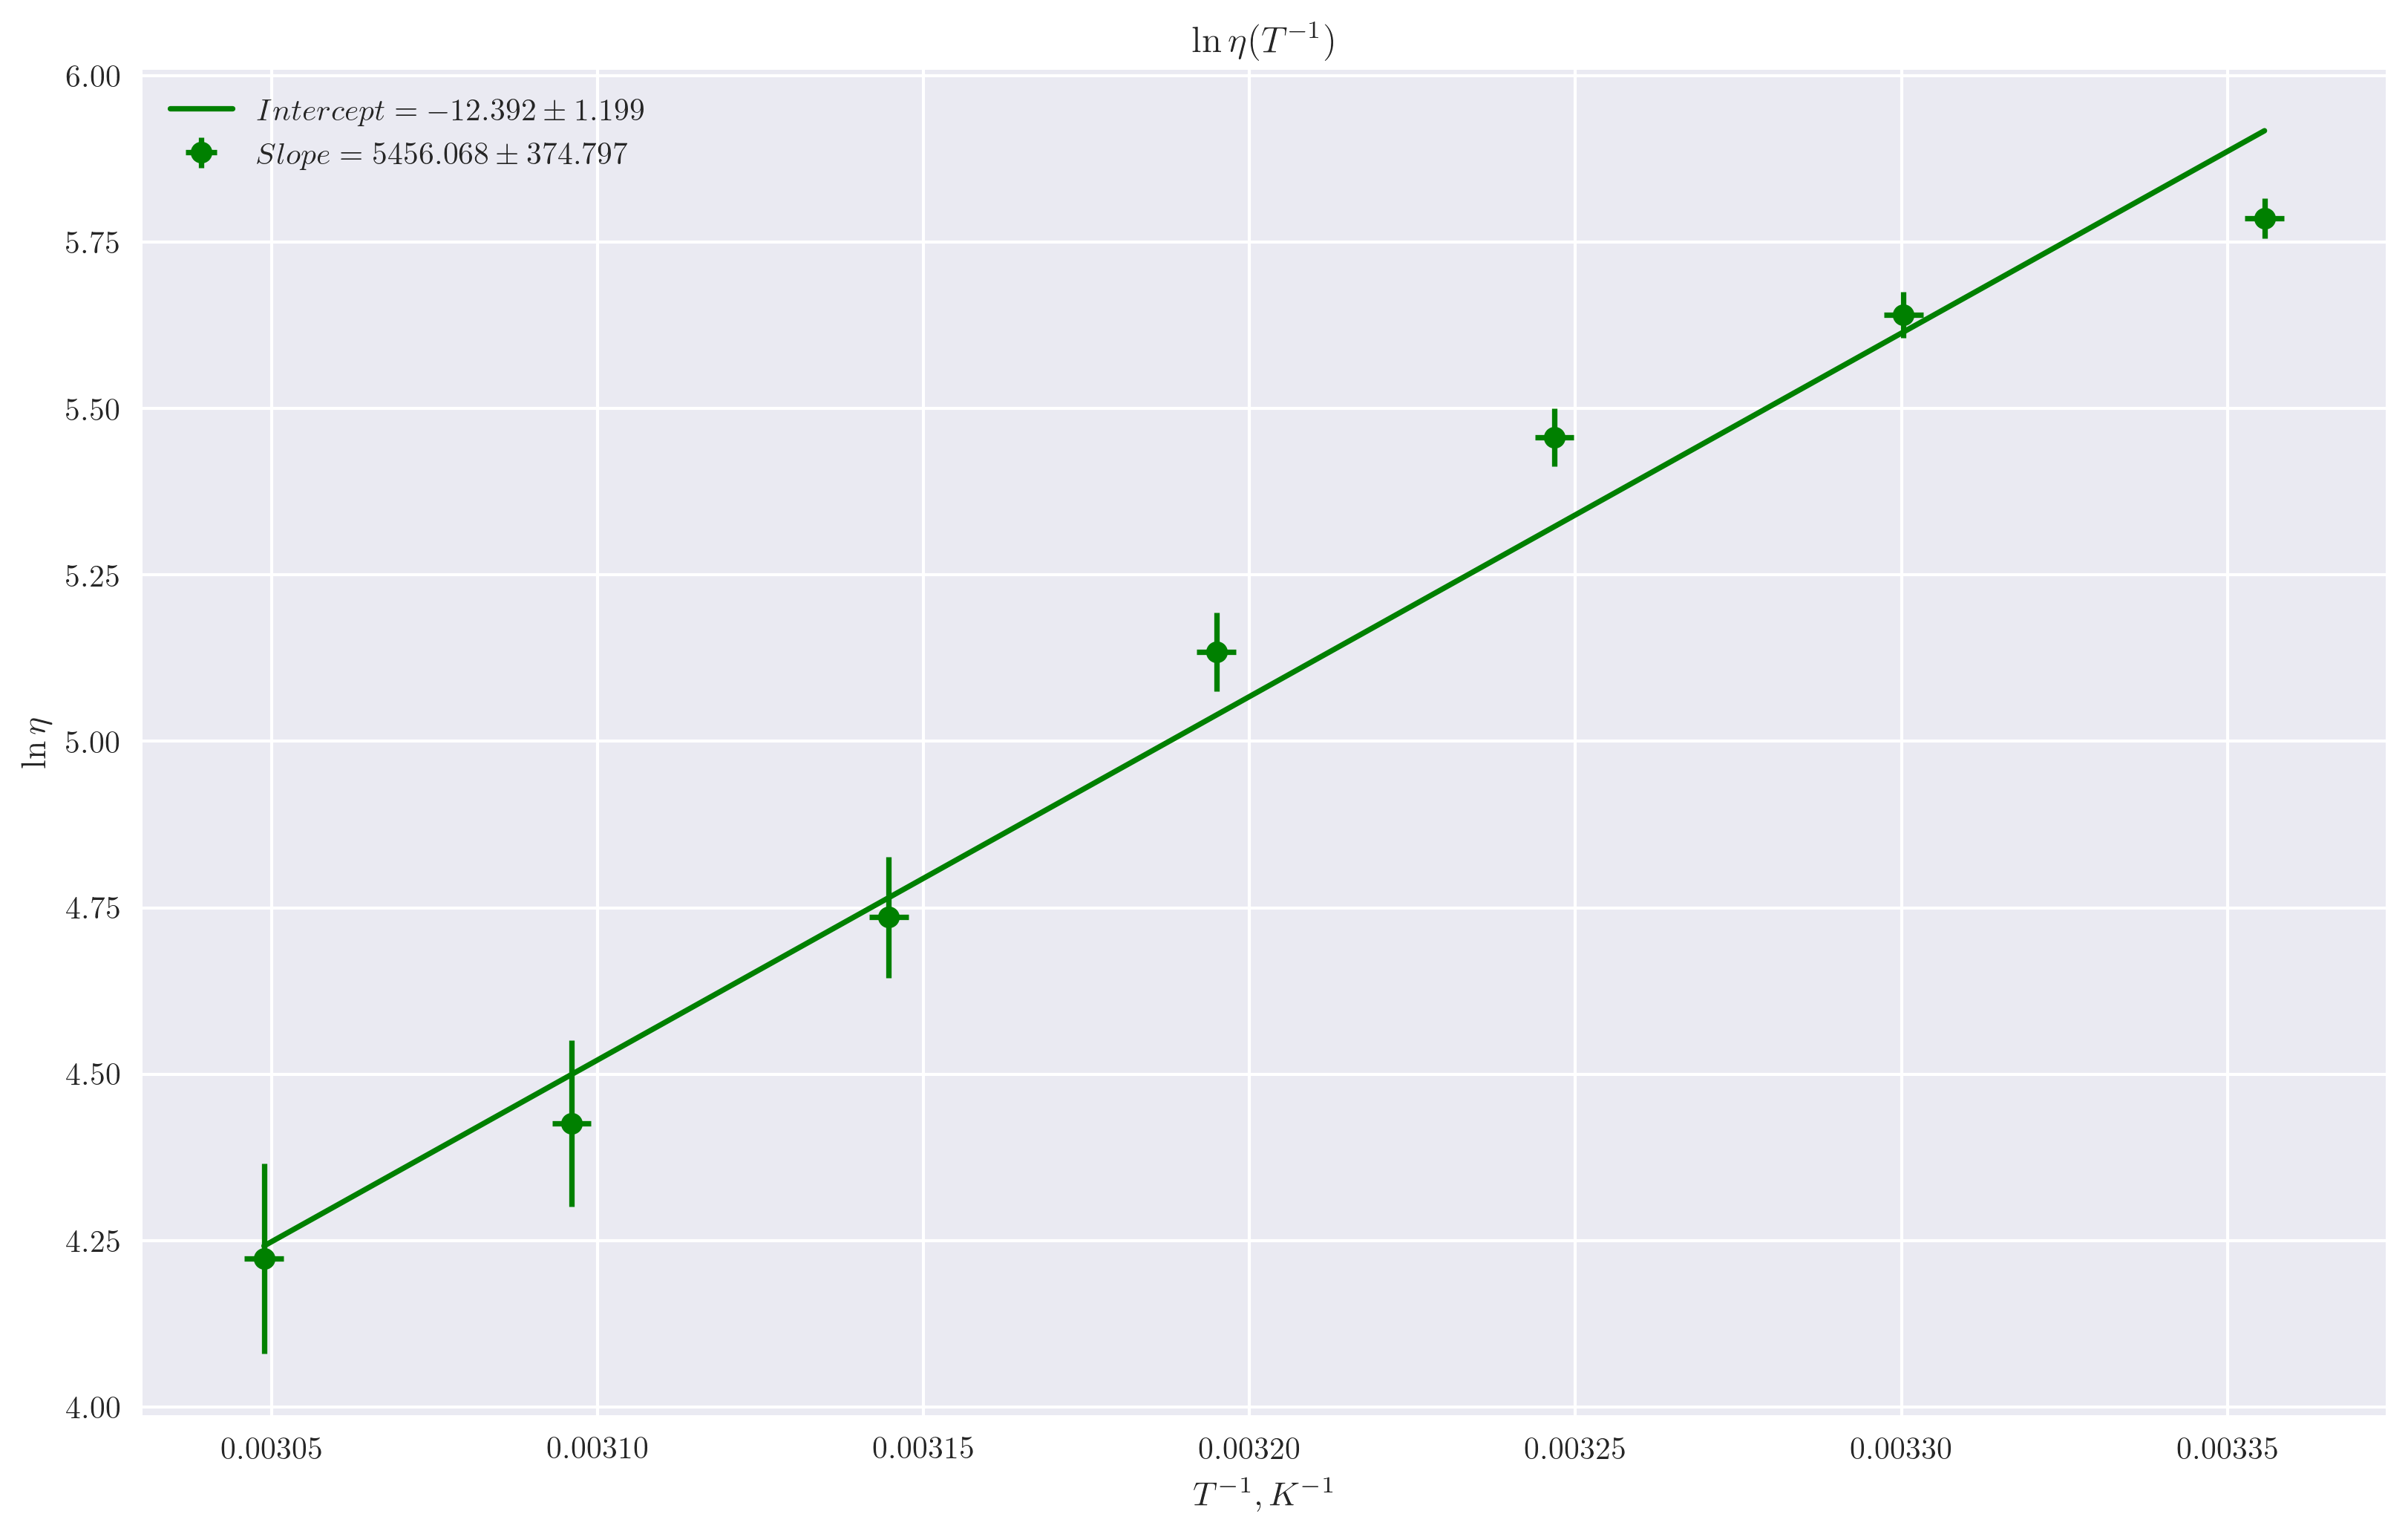

In [10]:
y = df['$ln(\\eta)$']
x = df['$T^{-1}, K^{-1}$']
yerr = 1/np.array([33, 29, 23, 17, 11, 8, 7])
sl.linplot(x, y, title='$\\ln\\eta(T^{-1})$', xlabel='$T^{-1}, K^{-1}$', ylabel='$\\ln\\eta$', 
           xerr=sl.abserror(0.000003, x), yerr=yerr)

Из графика энергия активации
$$ W_a=(5500\,\pm\,400)\ K=(0.47\,\pm\,0.04)\ eV $$

## Выводы

Полученное значение близко к энергии испарения жидкости, деленной на 1 молекулу:
$$ W = \frac L{N_A}=0.62\ eV $$
$L$ здесь - молярная теплота испарения глицерина$$$$
Полученные числа Рейнольдса подтверждают применимость уравнения Стокса.